## Usage

In [2]:
!pip install nixtlats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.6.1
    Uninstalling pydantic-2.6.1:
      Successfully uninstalled pydantic-2.6.1


In [13]:
from nixtlats import TimeGPT

You can instantiate the `TimeGPT` class providing your credentials.

In [14]:
timegpt = TimeGPT(
    # defaults to os.environ.get("TIMEGPT_TOKEN")
    token = 'HERE API'
)

You can test the validate of your token calling the `validate_token` method:

In [15]:
timegpt.validate_token()

True

Now you can begin making forecasts! Let's import an example using the classic U.S. CPI dataset. This dataset contains the monthly CPI in the U.S. between 1948 and 2023. First, let's load the dataset and plot it.

In [33]:
import pandas as pd

In [51]:
# Replace 'U.S-2024-01-cpi.csv' with the path to your file if it's located in a different directory
file_path = 'U.S-2024-01-cpi.csv'
df = pd.read_csv(file_path)
df.head()

,date,value
0,1948-01-01,10.24
1,1948-02-01,9.48
2,1948-03-01,6.82
3,1948-04-01,8.27
4,1948-05-01,9.38


In [40]:
df.tail()

,date,value
908,2023-09-01,3.69
909,2023-10-01,3.25
910,2023-11-01,3.14
911,2023-12-01,3.32
912,2024-01-01,3.11


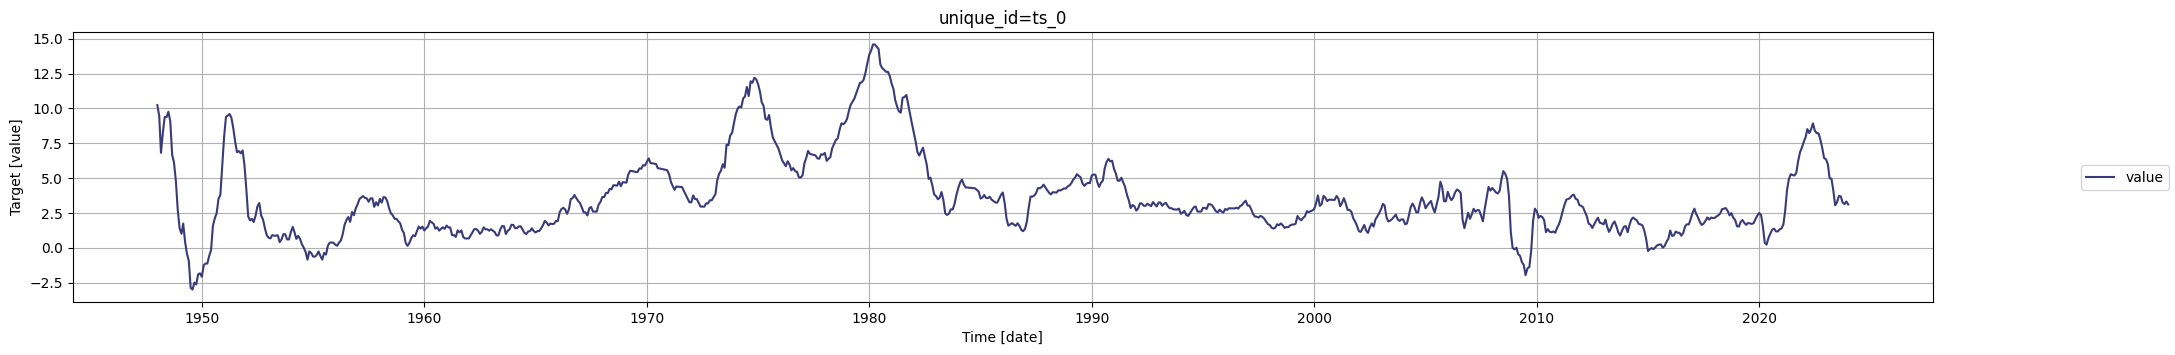

In [42]:
timegpt.plot(df, time_col='date', target_col='value')

Next, forecast the next **2 months** using the SDK `forecast` method. Set the following parameters:

- `df`: A pandas dataframe containing the time series data.
- `h`: The number of steps ahead to forecast.
- `freq`: The frequency of the time series in Pandas format. See [pandas’ available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
- `time_col`: Column that identifies the datestamp column.
- `target_col`: The variable that we want to forecast.

In [43]:
timegpt_fcst_df = timegpt.forecast(df=df, h=2, freq='MS', time_col='date', target_col='value')
timegpt_fcst_df.head()

,date,TimeGPT
0,2024-02-01,3.337661
1,2024-03-01,3.375965


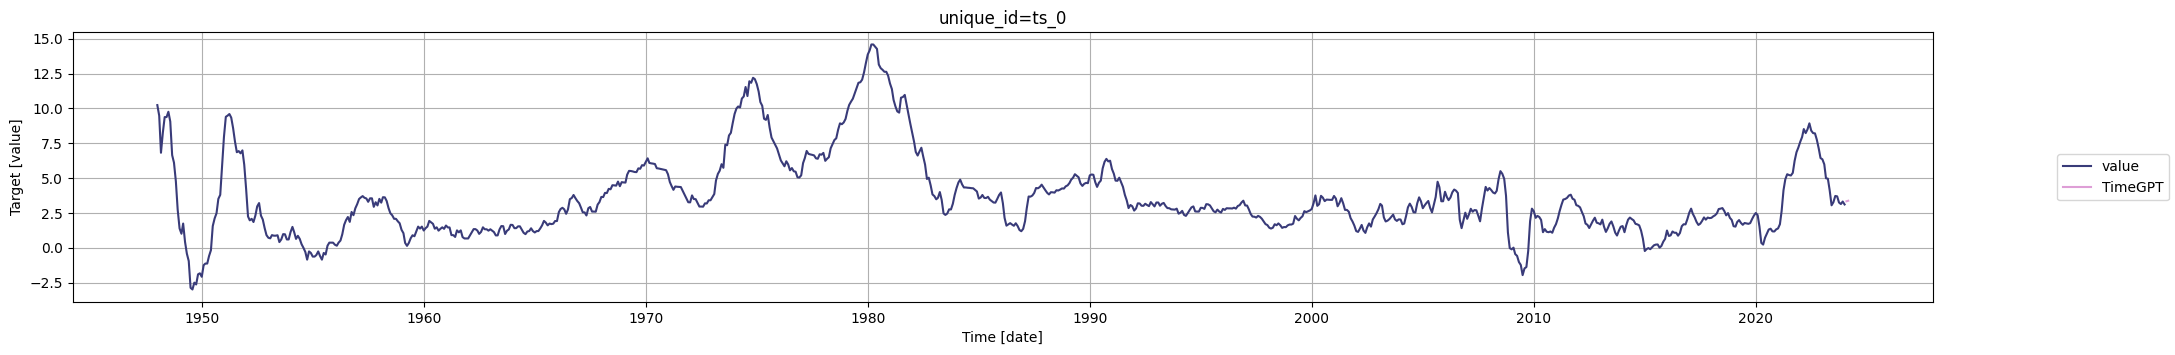

In [44]:
timegpt.plot(df, timegpt_fcst_df, time_col='date', target_col='value')

You can also produce a longer forecasts increasing the horizon parameter. For example, let's forecast the next 6 months:

In [45]:
timegpt_fcst_df = timegpt.forecast(df=df, h=6, time_col='date', target_col='value', freq='MS')
timegpt_fcst_df.head()

,date,TimeGPT
0,2024-02-01,3.337661
1,2024-03-01,3.375965
2,2024-04-01,3.407007
3,2024-05-01,3.416653
4,2024-06-01,3.267055


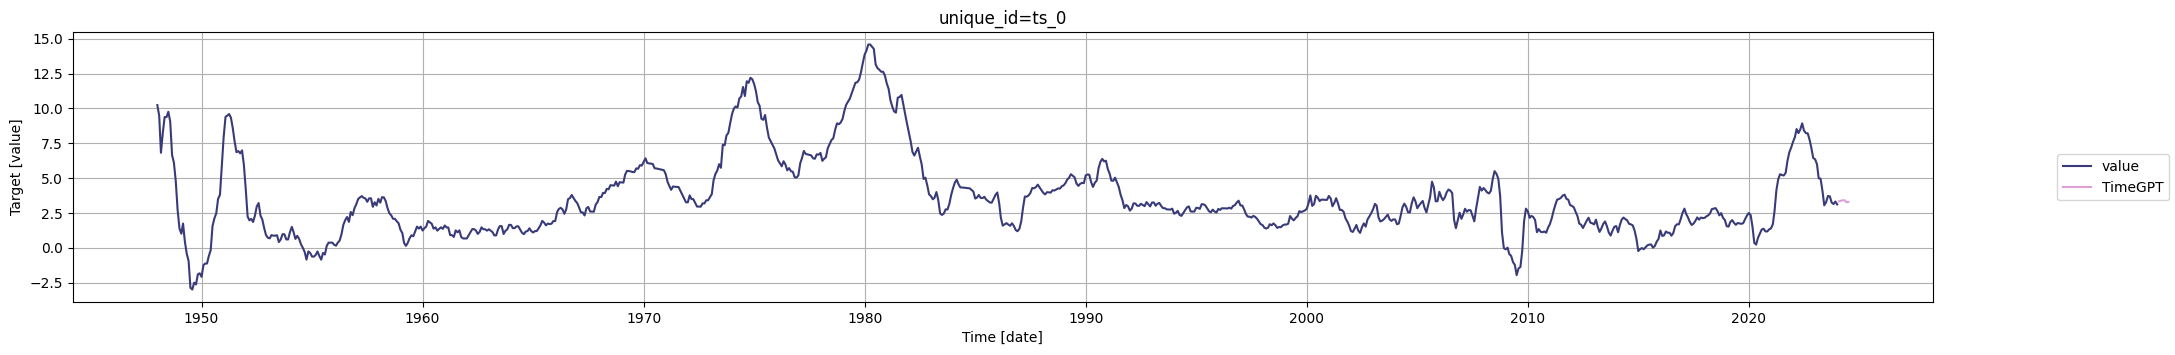

In [46]:
timegpt.plot(df, timegpt_fcst_df, time_col='date', target_col='value')